# Explanations visualization moleculized

In [47]:
from rdkit import Chem
from rdkit.Chem import Draw
from pysmiles import read_smiles
import networkx as nx

import numpy as np
from rdkit_heatmaps import mapvalues2mol
from rdkit_heatmaps.utils import transform2png

Definition and preparation of an exemplary compound.

In [7]:
test_mol = Chem.MolFromSmiles("CNC(=O)CN1CN(c2ccccc2)C2(CCN(Cc3cc4c(cc3Cl)OCO4)CC2)C1=O")
test_mol = Draw.PrepareMolForDrawing(test_mol)

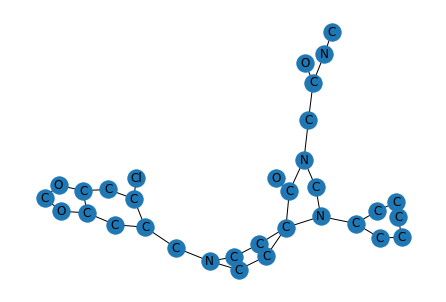

In [50]:
pysmile_mol = read_smiles("CNC(=O)CN1CN(c2ccccc2)C2(CCN(Cc3cc4c(cc3Cl)OCO4)CC2)C1=O")
labels = nx.get_node_attributes(pysmile_mol, 'element') 
nx.draw(pysmile_mol, labels = labels, pos=nx.spring_layout(pysmile_mol))

In [38]:
atom1 = test_mol.GetBondWithIdx(36).GetBeginAtomIdx()
print(atom1)
atom2 = test_mol.GetBondWithIdx(36).GetEndAtomIdx()
print(atom2)

28
21


Sampling values as exemplary weights for atoms and bonds:

In [8]:
random_generator = np.random.default_rng(12345)
atom_weights = random_generator.normal(loc=0.25, scale=0.25, size=len(test_mol.GetAtoms()))
bond_weights = random_generator.normal(loc=-0.25, scale=0.25, size=len(test_mol.GetBonds()))

Mapping obtained values to the molecule

In [14]:
from matplotlib.colors import ListedColormap

# Definition of color
yellow = np.array([1, 1, 0, 1])
white  = np.array([1, 1, 1, 1])
purple = np.array([1, 0, 1, 1])

# Creating linear gradient for color mixing
linspace = np.linspace(0, 1, int(128))
linspace4d = np.vstack([linspace]*4).T

# interpolating values for 0 to 0.5 by mixing purple and white
zero_to_half = linspace4d * white + (1-linspace4d) * purple
# interpolating values for 0.5 to 1 by mixing white and yellow
half_to_one = yellow * linspace4d + white * (1-linspace4d)

# Creating new colormap from 
newcmp = ListedColormap(np.vstack([zero_to_half,half_to_one]))

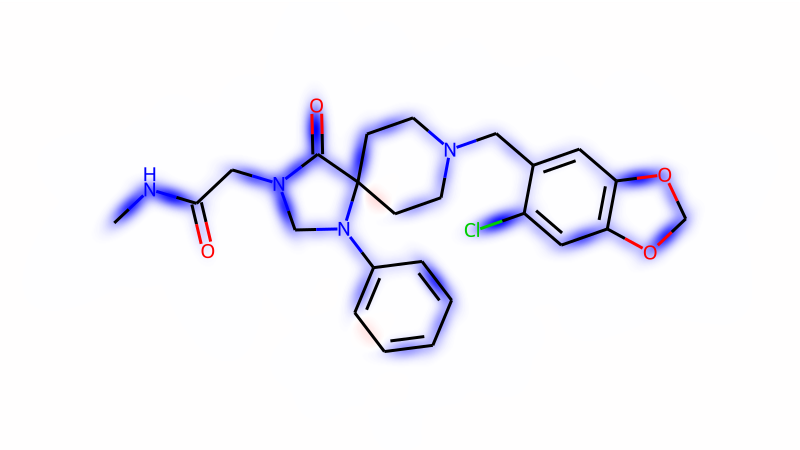

In [16]:
canvas = mapvalues2mol(test_mol, None, bond_weights, atom_width=0.2, bond_length=0.5, bond_width=0.2)
img = transform2png(canvas.GetDrawingText())
img

Using Shaply values as bond weights

In [20]:
phi = [-0.006205943231092107,
-0.013643475442562204,
0.019585820354095514,
0.040370309016611386,
0.07540229741698207,
-0.02433276445347004,
-0.059593423301726955,
0.03677082211748142,
-0.008207261833289093,
0.016467789992926436,
-0.018133246390282506,
0.028499816980789877,
0.006277069913198619,
0.03645847649328841,
-0.01777840753823781,
-0.020648258070879857,
0.014929854359372448,
0.0003951103626661307,
0.01823034189854896,
-0.0019728440948435884,
0.019411424848294046,
0.006368332311483429,
-0.0020907053674368648,
-0.011788460098811565,
0.01052160655659247,
-0.004236856477665408,
0.00956876685463622,
0.005877447387316158,
-0.00687709522105507,
0.0011439825992835952,
-0.010960866242605722,
-0.026332790177596436,
-0.0018023915740959548,
-0.0051123132298826176,
0.017058912375840337,
-0.007047644002542029,
0.08327785984068369,
0.004214236098047203,
0.1755940889452697,
0.09496229326611724,
0.23695975323516077,
-0.001381456974723273,
0.021222283693926522,
-0.054584305203129076,
-0.002161185537693141,
0.011975406051849501,
0.017931691545594444,
0.004378201911980503,
-0.002920933911887673,
0.0008706858378901394,
0.018766870779356612,
-0.009211260904228266,
-0.006481872657961175,
0.044108243983780805,
0.000656772088430648,
0.035464090057949045,
-0.02212126537566713,
-0.01522981561973402,
0.027845028728465473,
-0.028351794685891222,
-0.0010296450993044764,
0.001608915535558853,
0.01557856755757335,
0.019166104405022685,
-0.0060215028369109466,
0.0034923653280209267,
-0.004222763813965596,
0.12683050835062062,
0.06942581887540916,
-0.005607439515239256,
-0.027149130439688075,
-0.015169782076864086,
0.05340398810471654,
0.023115008182021078]

edge_index = [[ 0,  1,  1,  2,  2,  2,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,  7,  8,
          8,  8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 14, 14, 15, 15,
         16, 16, 17, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21, 21, 21, 22, 22, 22,
         23, 23, 24, 24, 24, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31,
         31, 32],
        [ 1,  0,  2,  1,  3,  4,  2,  2,  5,  4,  6, 31,  5,  7,  6,  8, 14,  7,
          9, 13,  8, 10,  9, 11, 10, 12, 11, 13,  8, 12,  7, 15, 30, 31, 14, 16,
         15, 17, 16, 18, 29, 17, 19, 18, 20, 24, 19, 21, 20, 22, 28, 21, 23, 26,
         22, 24, 19, 23, 25, 24, 22, 27, 26, 28, 21, 27, 17, 30, 14, 29,  5, 14,
         32, 31]]

In [ ]:
for i in range(len(edge_index)):
    for j in range(len(edge_index[0])):
        pass

In [41]:
len(phi)/2

37.0

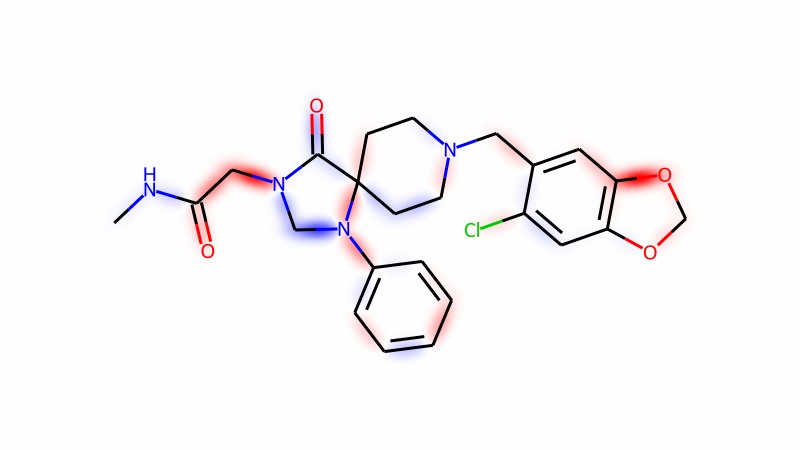

In [42]:
canvas = mapvalues2mol(test_mol, None, phi[:len(phi)//2], atom_width=0.2, bond_length=0.5, bond_width=0.2)
img = transform2png(canvas.GetDrawingText())
img